## Abundances across the Milky Way

`astroNN_apogee_dr14_catalog.fits` is available at https://github.com/henrysky/astroNN_spectra_paper_figures/raw/master/astroNN_apogee_dr14_catalog.fits

Number of star:  (52476,)


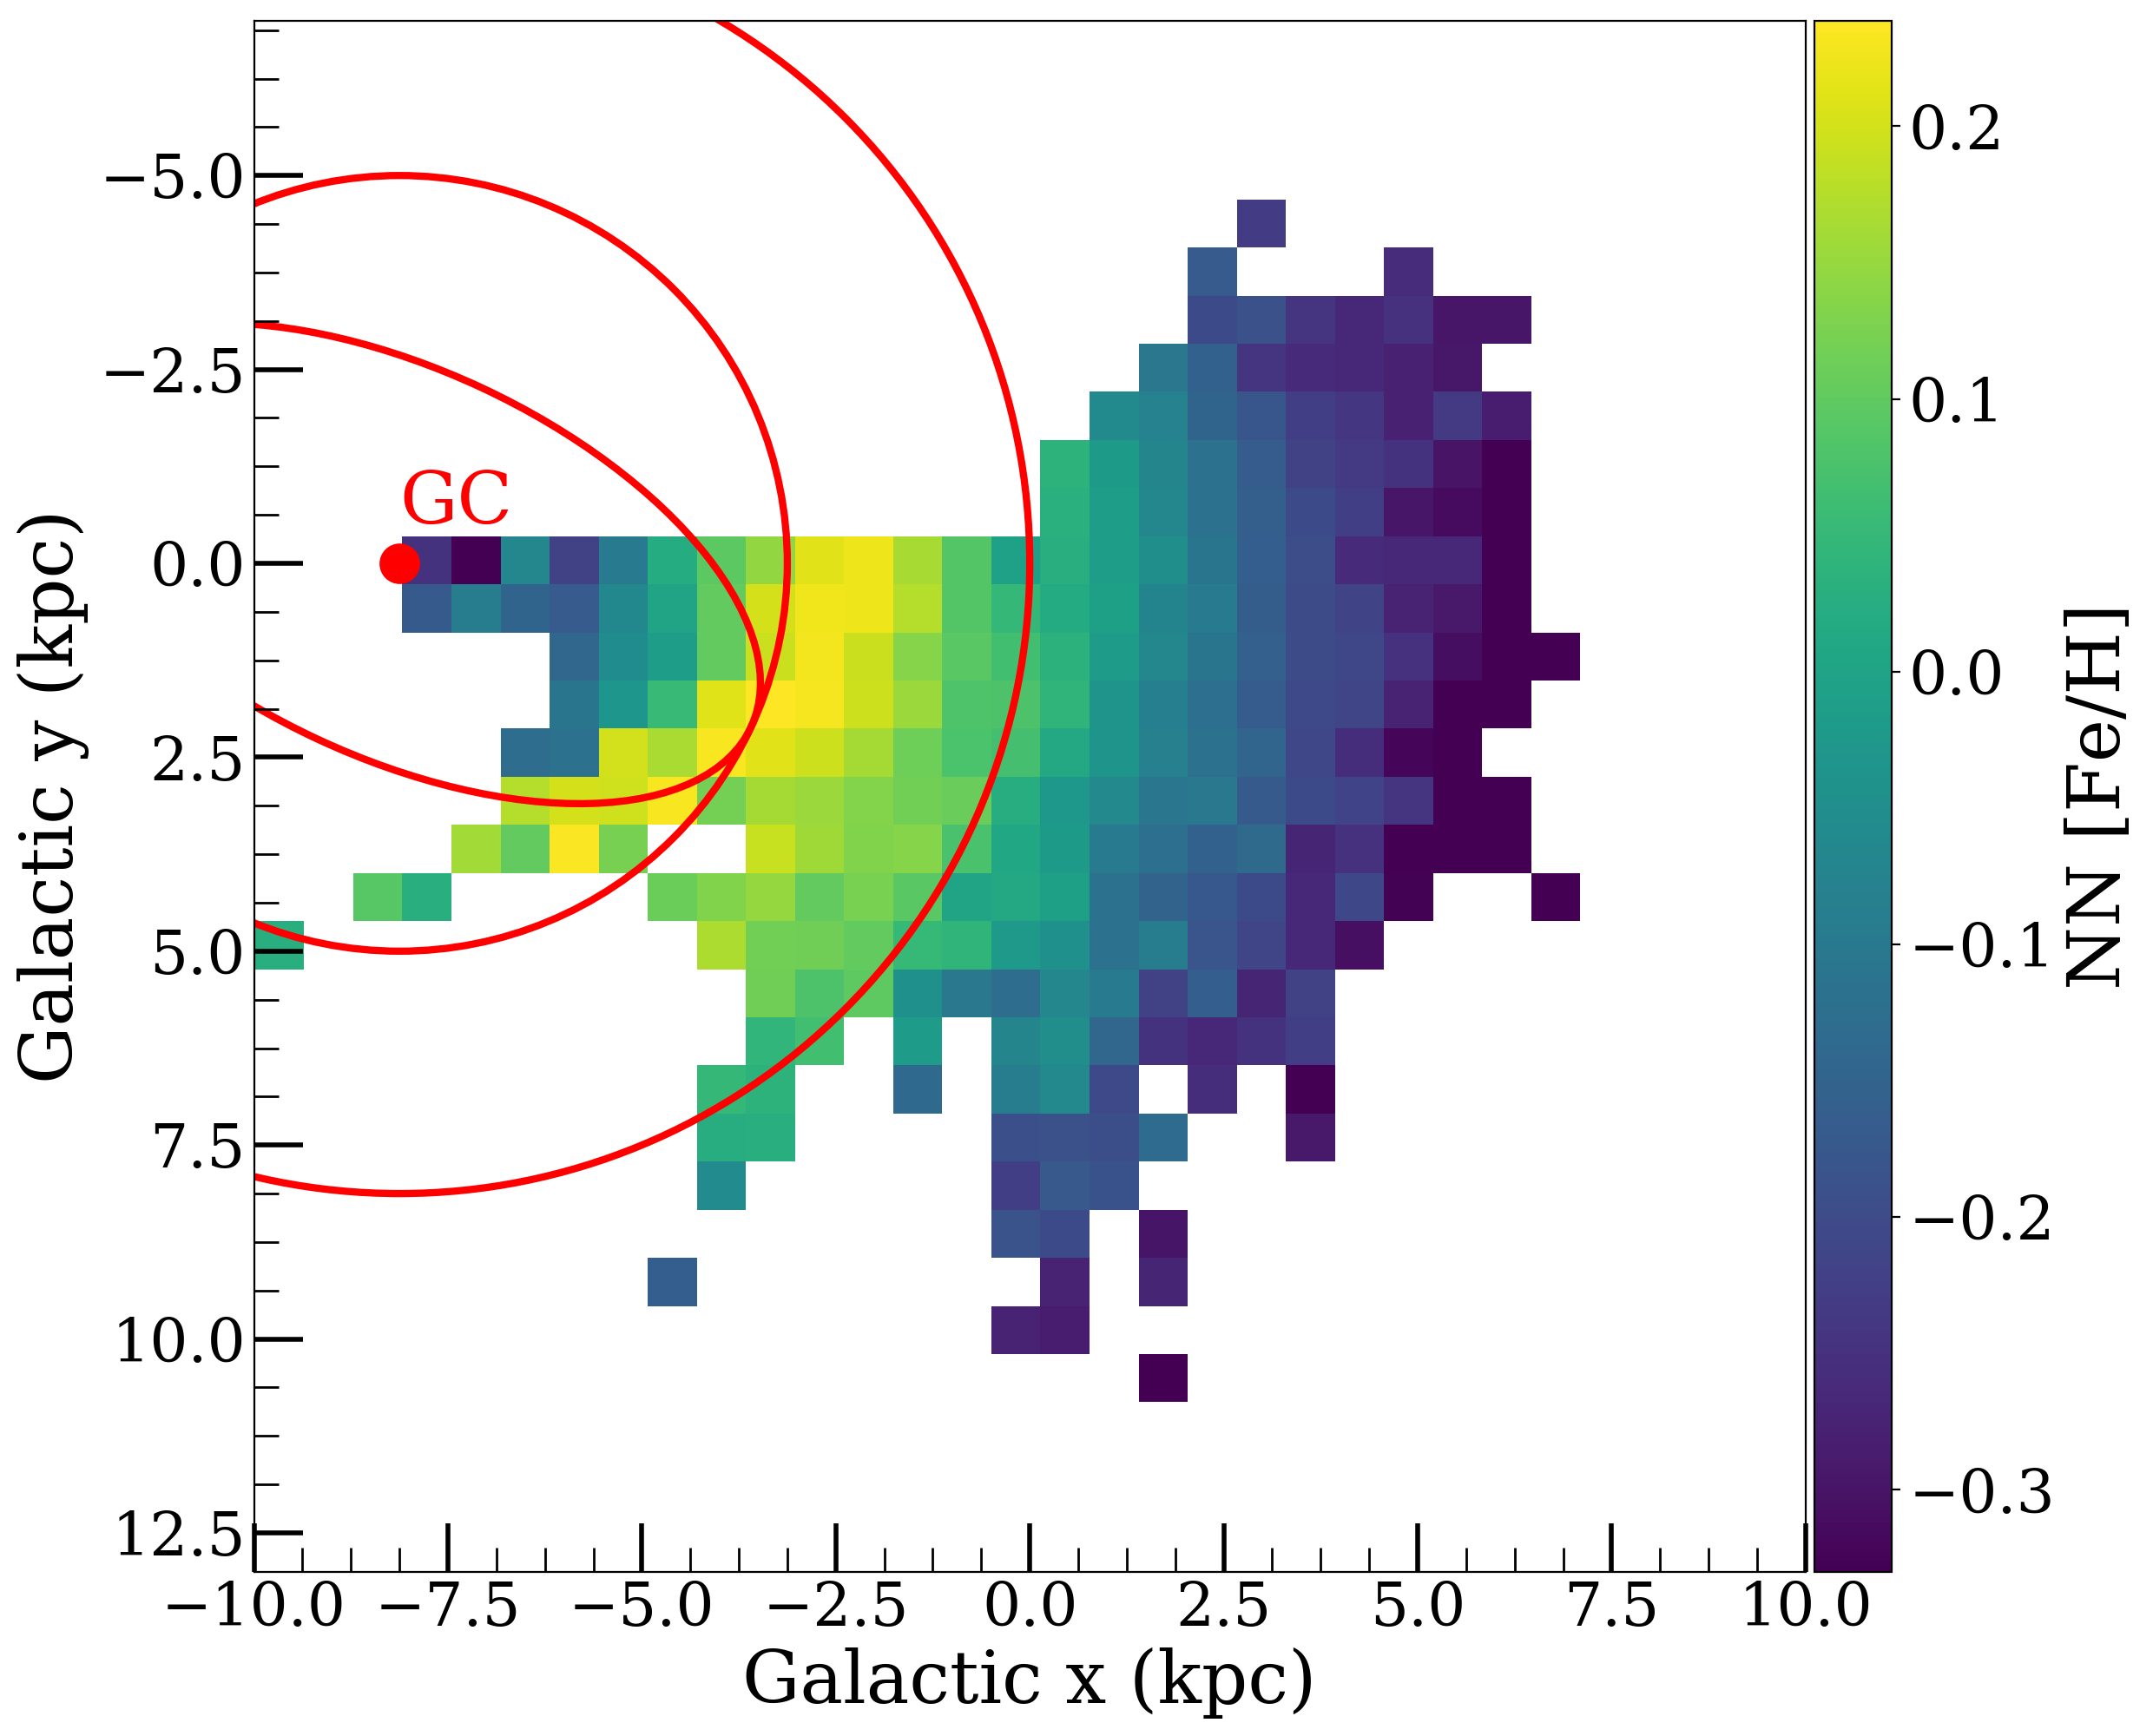

In [2]:
%matplotlib inline
from astropy.io import fits
from astropy import units as u
import astropy.coordinates as coords
from astropy.coordinates import CartesianDifferential
import numpy as np
import pylab as plt
from scipy.stats import binned_statistic_2d

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

f = fits.getdata("apogee_dr14_nn_dist.fits")
nn_distance = f["dist"]
nn_distance_error = f["dist_model_error"]
ra = f["ra"]  # gaia dr2 ra j2015.5
dec = f["dec"]  # gaia dr2 dec j2015.5

f = fits.getdata("astroNN_apogee_dr14_catalog.fits")  # see above
FeH = f["astroNN"][:, 19]
logg_err = f["astroNN_error"][:, 1]
FeH_uncertainty = f["astroNN_error"][:, 19]

non_n9999_idx = (
    (nn_distance != -9999.0) & (ra != -9999.0) & (dec != -9999.0) & (logg_err < 0.2)
)

c = coords.SkyCoord(
    ra=ra[non_n9999_idx] * u.degree,
    dec=dec[non_n9999_idx] * u.degree,
    distance=nn_distance[non_n9999_idx] * u.pc,
    galcen_distance=8.125
    * u.kpc,  # https://arxiv.org/abs/1807.09409 (GRAVITY Collaboration 2018)
    z_sun=20.8 * u.pc,  # https://arxiv.org/abs/1809.03507 (Bennett & Bovy 2018)
    galcen_v_sun=CartesianDifferential([11.1, 245.7, 7.25] * u.km / u.s),
)

good_idx = (
    (nn_distance[non_n9999_idx] / nn_distance_error[non_n9999_idx] > 5)
    & (FeH[non_n9999_idx] != -9999.0)
    & (FeH_uncertainty[non_n9999_idx] < 0.05)
    & (np.abs(c.galactocentric.cartesian.z.value) < 300)
)

c2 = c[good_idx]
print("Number of star: ", c2.shape)

hist, xedges, yedges, binid = binned_statistic_2d(
    -c2.galactic.cartesian.x / 1000,
    c2.galactic.cartesian.y / 1000,
    FeH[non_n9999_idx][good_idx],
    np.median,
    bins=40,
)
_hist, _, _, _ = binned_statistic_2d(
    -c2.galactic.cartesian.x / 1000,
    c2.galactic.cartesian.y / 1000,
    FeH[non_n9999_idx][good_idx],
    "count",
    bins=40,
)

hist[(_hist < 10)] = np.NaN

vmin, vmax = (
    np.percentile(FeH[non_n9999_idx][good_idx], 10),
    np.percentile(FeH[non_n9999_idx][good_idx], 90),
)
fig, ax = plt.subplots(figsize=(13, 10.4), dpi=200)
img = ax.imshow(
    np.rot90(hist),
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    vmin=vmin,
    vmax=vmax,
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, mappable=img)
cbar.set_label("NN [Fe/H]", fontsize=30)
cbar.ax.tick_params(labelsize=25)
ax.set_xlabel("Galactic x (kpc)", fontsize=30)
ax.set_ylabel("Galactic y (kpc)", fontsize=30)
ax.set_xlim((-10, 10))
ax.set_ylim((-7, 13))
ax.scatter(-8.125, 0, s=250, c="red")
ax.annotate("GC", (-8.125, -0.5), color="r", fontsize=30)
circle1 = plt.Circle((-8.125, 0), 8.125, color="r", ls="solid", lw="3.", fill=False)
circle2 = plt.Circle((-8.125, 0), 5, color="r", ls="solid", lw="3.", fill=False)
# bar ratio (10, 6.3): https://arxiv.org/abs/1308.0593
circle3 = matplotlib.patches.Ellipse(
    (-8.125, 0), 10, 5, 25, fc="none", ls="solid", ec="r", lw="3."
)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.invert_yaxis()
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2, length=20, which="major")
ax.tick_params(width=1, length=10, which="minor")
ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", which="both")
fig.tight_layout()
fig.savefig("mw_chem/Fe_H.pdf")

Number of star [C/Fe]:  (52404,)
Number of star [N/Fe]:  (52371,)
Number of star [O/Fe]:  (52432,)
Number of star [Na/Fe]:  (15833,)
Number of star [Mg/Fe]:  (52447,)
Number of star [Al/Fe]:  (49739,)
Number of star [Si/Fe]:  (52476,)
Number of star [S/Fe]:  (52310,)
Number of star [K/Fe]:  (51529,)
Number of star [Ca/Fe]:  (52475,)
Number of star [TiII/Fe]:  (45707,)
Number of star [V/Fe]:  (50257,)
Number of star [Mn/Fe]:  (52470,)
Number of star [Co/Fe]:  (42242,)
Number of star [Ni/Fe]:  (52476,)


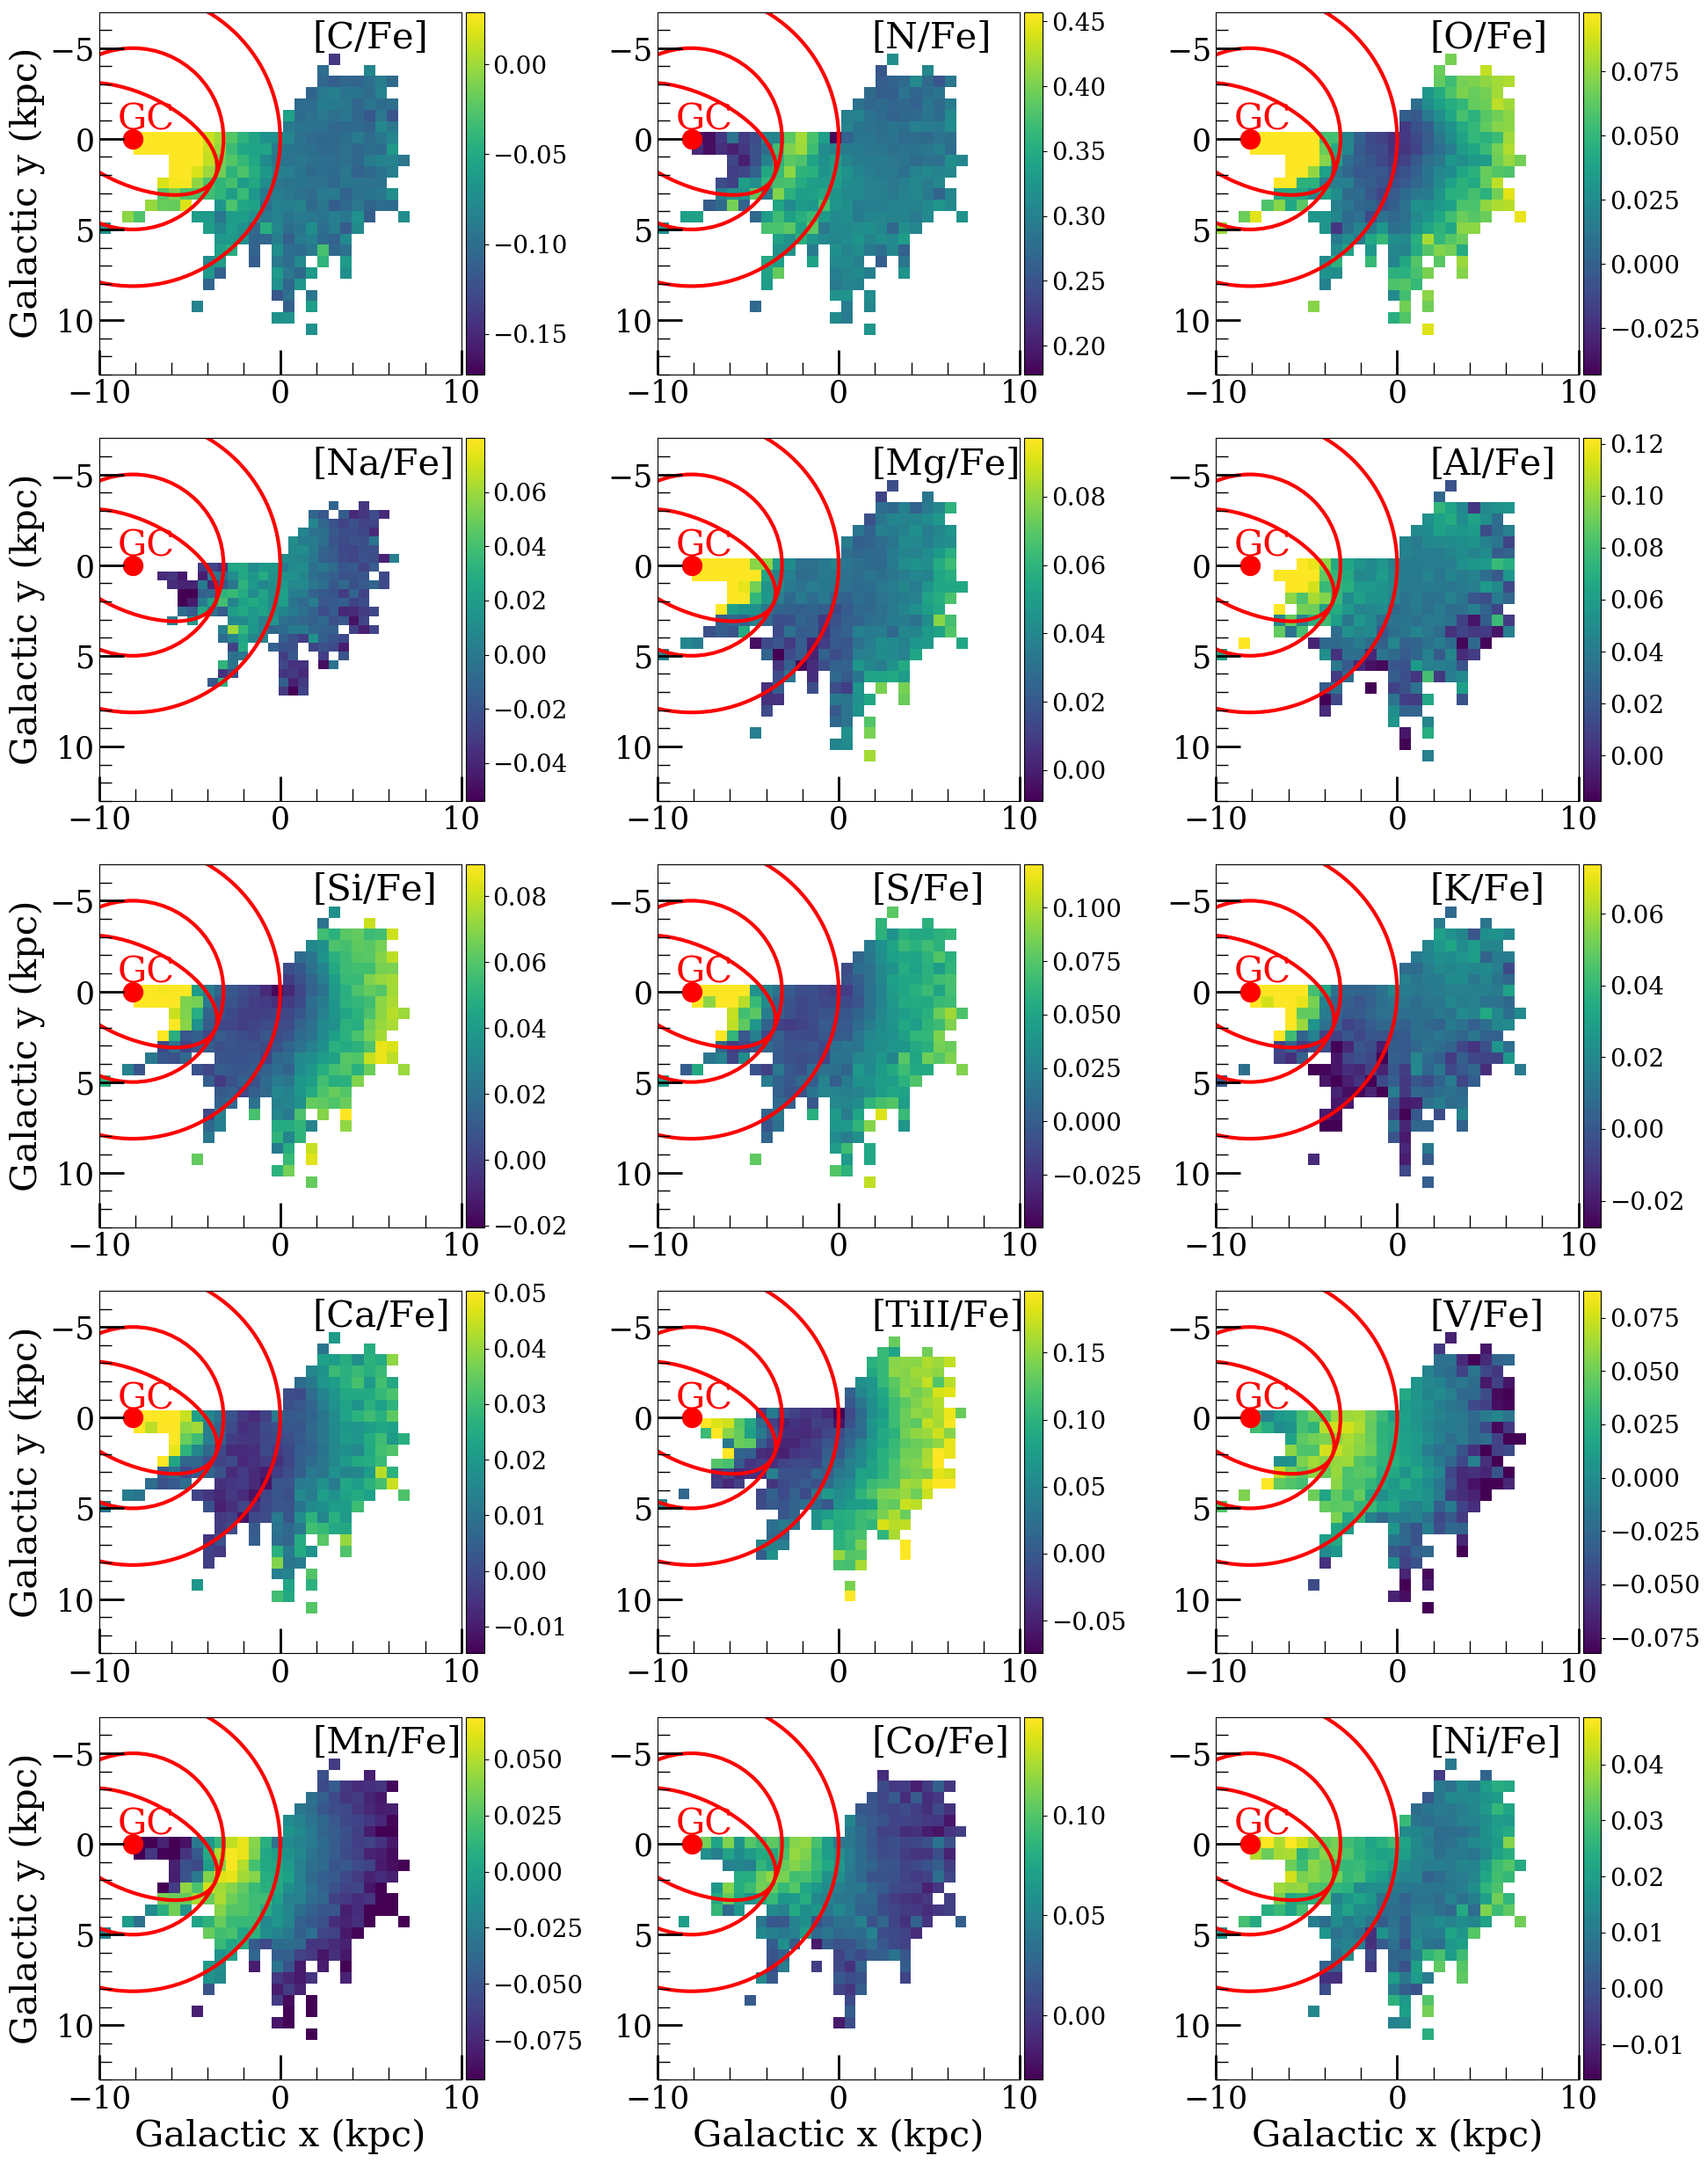

In [3]:
%matplotlib inline

from astropy.io import fits
from astropy import units as u
import astropy.coordinates as coords
from astropy.coordinates import CartesianDifferential
import numpy as np
import pylab as plt
from scipy.stats import binned_statistic_2d
import matplotlib.gridspec as gridspec

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter

plt.rc("font", **{"family": "serif", "weight": "medium", "size": 20})

# list of abundances name in `astroNN_apogee_dr14_catalog.fits`
targetname = [
    "teff",
    "logg",
    "C",
    "CI",
    "N",
    "O",
    "Na",
    "Mg",
    "Al",
    "Si",
    "P",
    "S",
    "K",
    "Ca",
    "Ti",
    "TiII",
    "V",
    "Cr",
    "Mn",
    "Fe",
    "Co",
    "Ni",
]

f = fits.getdata("apogee_dr14_nn_dist.fits")
nn_distance = f["dist"]
nn_distance_error = f["dist_model_error"]
ra = f["ra"]  # gaia dr2 ra j2015.5
dec = f["dec"]  # gaia dr2 dec j2015.5

f = fits.getdata("astroNN_apogee_dr14_catalog.fits")
FeH = f["astroNN"][:, 19]
logg_err = f["astroNN_error"][:, 1]
FeH_uncertainty = f["astroNN_error"][:, 19]

non_n9999_idx = (
    (nn_distance != -9999.0) & (ra != -9999.0) & (dec != -9999.0) & (logg_err < 0.2)
)

c = coords.SkyCoord(
    ra=ra[non_n9999_idx] * u.degree,
    dec=dec[non_n9999_idx] * u.degree,
    distance=nn_distance[non_n9999_idx] * u.pc,
    galcen_distance=8.125
    * u.kpc,  # https://arxiv.org/abs/1807.09409 (GRAVITY Collaboration 2018)
    z_sun=20.8 * u.pc,  # https://arxiv.org/abs/1809.03507 (Bennett & Bovy 2018)
    galcen_v_sun=CartesianDifferential([11.1, 245.7, 7.25] * u.km / u.s),
)

counter = 0
ax_counter = 0
elem_id_list = [2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 20, 21]

# gs = gridspec.GridSpec(1, 3)
fig, ax = plt.subplots(5, 3, figsize=(20, 25), dpi=100)

# ax = [ax1, ax2, ax3]

for j in range(5):
    for k in range(3):
        i = elem_id_list[counter]
        chem_elem = f["astroNN"][:, i] - FeH
        chem_elem_uncertainty = f["astroNN_error"][:, i]

        good_idx = (
            (nn_distance[non_n9999_idx] / nn_distance_error[non_n9999_idx] > 5)
            & (chem_elem[non_n9999_idx] != -9999.0)
            & (chem_elem_uncertainty[non_n9999_idx] < 0.1)
            & (FeH_uncertainty[non_n9999_idx] < 0.05)
            & (np.abs(c.galactocentric.cartesian.z.value) < 300)
        )

        c2 = c[good_idx]
        print(f"Number of star [{targetname[i]}/Fe]: ", c2.shape)

        hist, xedges, yedges, binid = binned_statistic_2d(
            -c2.galactic.cartesian.x / 1000,
            c2.galactic.cartesian.y / 1000,
            chem_elem[non_n9999_idx][good_idx],
            np.median,
            bins=40,
        )
        _hist, _, _, _ = binned_statistic_2d(
            -c2.galactic.cartesian.x / 1000,
            c2.galactic.cartesian.y / 1000,
            FeH[non_n9999_idx][good_idx],
            "count",
            bins=40,
        )
        hist[(_hist < 10)] = np.NaN

        vmin, vmax = (
            np.percentile(chem_elem[non_n9999_idx][good_idx], 10),
            np.percentile(chem_elem[non_n9999_idx][good_idx], 90),
        )
        img = ax[j, k].imshow(
            np.rot90(hist),
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
            vmin=vmin,
            vmax=vmax,
        )
        divider = make_axes_locatable(ax[j, k])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cax=cax, mappable=img)
        if j == 4:
            ax[j, k].set_xlabel("Galactic x (kpc)", fontsize=30)
        if k == 0:
            ax[j, k].set_ylabel("Galactic y (kpc)", fontsize=30)
        ax[j, k].set_xlim((-10, 10))
        ax[j, k].set_ylim((-7, 13))
        ax[j, k].scatter(-8.125, 0, s=250, c="red")
        ax[j, k].annotate("GC", (-9.0, -0.5), color="r", fontsize=30)
        circle1 = plt.Circle(
            (-8.125, 0), 8.125, color="r", ls="solid", lw="3.", fill=False
        )
        circle2 = plt.Circle((-8.125, 0), 5, color="r", ls="solid", lw="3.", fill=False)
        # bar ratio (10, 6.3): https://arxiv.org/abs/1308.0593
        circle3 = matplotlib.patches.Ellipse(
            (-8.125, 0), 10, 5, 25, fc="none", ls="solid", ec="r", lw="3."
        )
        ax[j, k].add_artist(circle1)
        ax[j, k].add_artist(circle2)
        ax[j, k].add_artist(circle3)
        ax[j, k].invert_yaxis()
        ax[j, k].minorticks_on()
        ax[j, k].tick_params(labelsize=25, width=2, length=20, which="major")
        ax[j, k].tick_params(width=1, length=10, which="minor")
        ax[j, k].xaxis.set_tick_params(direction="in", which="both")
        ax[j, k].yaxis.set_tick_params(direction="in", which="both")
        ax[j, k].annotate(
            f"[{targetname[i]}/Fe]",
            xy=(0.59, 0.9),
            xycoords="axes fraction",
            fontsize=30,
        )
        if counter < 14:
            counter += 1
        else:
            break

fig.tight_layout()
fig.savefig(f"all_u_can_elem.pdf")
plt.show()